<a href="https://colab.research.google.com/github/PrachitiSParulekar/Movie-Recommendation-Engine-Pearson-Cosine-Collaborative-Filtering/blob/main/VD_Recommender_Mean_Fill_vs_Zero_Fill.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Workflow Overview:

Started with a toy rating matrix to demonstrate basic SVD decomposition and top-N recommendation logic.

Loaded the MovieLens Small dataset and preprocessed it into a user-movie ratings matrix, filtering for movies with at least 10 ratings.

Explored two missing value strategies:

Zero-filling (unrated as 0)

Mean-filling (unrated filled with user’s own mean rating)

Applied Truncated SVD to both matrices, reconstructed predicted ratings, and generated recommendations for each user.

Visualized user and movie distributions in latent feature space, revealing underlying clusters.



In [ ]:
import numpy as np
import pandas as pd

In [ ]:
R = np.array([
     [5, 4, 0, 1],
    [3, 0, 2, 1],
    [0, 5, 4, 0]
], dtype=float)

In [ ]:
R_filled = R.copy()
mean_rating = np.sum(R)/ np.count_nonzero(R)
R_filled[R_filled == 0] = mean_rating

In [ ]:
#svd perform - singular value decomposition
U, S, Vt = np.linalg.svd(R_filled, full_matrices= False)
S_matrix = np.diag(S)

In [ ]:
#top k
k = 2
U_k = U[:, :k]
S_k = np.diag(S[:k])
Vt_k = Vt[:k,:]
R_approx = U_k @ S_k @ Vt_k

In [ ]:
# Predicted matrix (fill original 0s with approximations)
R_pred = R.copy()
R_pred[R_pred == 0] = R_approx[R_pred == 0]

In [ ]:
N = 2
recommendations = {}
user_names = ["User1", "User2", "User3"]
movie_names = ["Movie1", "Movie2", "Movie3", "Movie4"]

In [ ]:
for user_idx, user_name in enumerate(user_names):
  unrated = np.where(R[user_idx] == 0)[0]

  scores = [(movie_names[m], R_pred[user_idx, m]) for m in unrated]

  scores_sorted = sorted(scores, key=lambda x: x[1], reverse=True)
  recommendations[user_name] = scores_sorted[:N]

  df_recommend = pd.DataFrame(dict([(k, pd.Series(v)) for k,v in recommendations.items()]))

In [ ]:
df_recommend.head()

,User1,User2,User3
0,"(Movie3, 3.024328796355591)","(Movie2, 2.924769437523138)","(Movie4, 3.1196099042222)"
1,NaN,NaN,"(Movie1, 3.1186555660276554)"


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shubhammehta21/movie-lens-small-latest-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'movie-lens-small-latest-dataset' dataset.
Path to dataset files: /kaggle/input/movie-lens-small-latest-dataset


In [ ]:
import os
ratings_path = os.path.join(path, 'ratings.csv')
movies_path = os.path.join(path, 'movies.csv')

# Read the CSV files using the full paths
ratings = pd.read_csv(ratings_path)
movies = pd.read_csv(movies_path)

# Merge and process the data as required
ratings = pd.merge(movies, ratings).drop(['genres', 'timestamp'], axis=1)
print(ratings.shape)
print(ratings.head())

(100836, 4)
   movieId             title  userId  rating
0        1  Toy Story (1995)       1     4.0
1        1  Toy Story (1995)       5     4.0
2        1  Toy Story (1995)       7     4.5
3        1  Toy Story (1995)      15     2.5
4        1  Toy Story (1995)      17     4.5


In [ ]:
userRatings = ratings.pivot_table(index=['userId'], columns=['title'], values='rating')
userRatings.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
userRating = userRatings.dropna(thresh = 10, axis= 1 ).fillna(0, axis=1)
print(userRating.shape)

(610, 2269)


In [ ]:
from sklearn.decomposition import TruncatedSVD

n_components = 1000  # Can try higher if you like
svd = TruncatedSVD(n_components=n_components)
U = svd.fit_transform(userRating)
VT = svd.components_

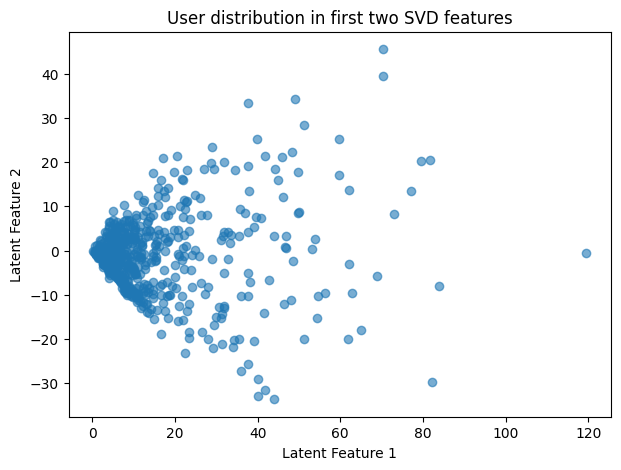

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(U[:, 0], U[:, 1], alpha=0.6)
plt.title("User distribution in first two SVD features")
plt.xlabel("Latent Feature 1")
plt.ylabel("Latent Feature 2")
plt.show()

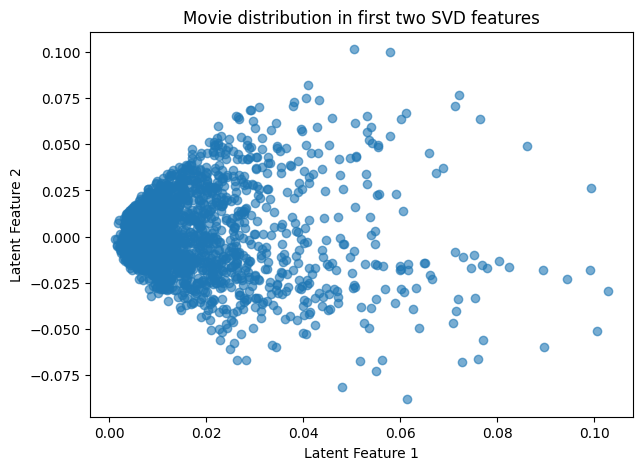

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(VT[0], VT[1], alpha=0.6)
plt.title("Movie distribution in first two SVD features")
plt.xlabel("Latent Feature 1")
plt.ylabel("Latent Feature 2")
plt.show()


In [ ]:
svd_ratings_matrix = np.dot(U, VT)
predicted_ratings_df = pd.DataFrame(svd_ratings_matrix, index=userRating.index, columns=userRating.columns)

In [ ]:
# Improvement Suggestion: Check explained variance to justify component selection
print(f"Explained variance with {n_components} components: {svd.explained_variance_ratio_.sum():.2%}")
print(f"\nExplained variance by component:")
for i, var in enumerate(svd.explained_variance_ratio_[:10], 1):
    print(f"Component {i}: {var:.2%}")

Explained variance with 1000 components: 100.00%

Explained variance by component:
Component 1: 15.07%
Component 2: 4.99%
Component 3: 3.03%
Component 4: 2.43%
Component 5: 2.04%
Component 6: 1.88%
Component 7: 1.65%
Component 8: 1.16%
Component 9: 1.15%
Component 10: 0.99%


In [ ]:
def recommend_svd(user_id, actual_matrix, predictions, top_n=10):
    user_rated = actual_matrix.loc[user_id][actual_matrix.loc[user_id] != 0].index
    preds = predictions.loc[user_id].drop(user_rated, errors='ignore')
    return preds.sort_values(ascending=False).head(top_n)

# Example for userId=1
print(recommend_svd(user_id=1, actual_matrix=userRating, predictions=predicted_ratings_df, top_n=10))

title
Die Hard (1988)                           3.740327
Godfather, The (1972)                     3.705863
Terminator 2: Judgment Day (1991)         3.491984
Godfather: Part II, The (1974)            3.435183
Jaws (1975)                               3.176425
Snatch (2000)                             3.072040
Aliens (1986)                             3.034654
Hunt for Red October, The (1990)          2.799440
Breakfast Club, The (1985)                2.766204
Star Trek II: The Wrath of Khan (1982)    2.682767
Name: 1, dtype: float64


In [ ]:
# Mean-fill for each user (row-wise)
user_item_meanfill = userRating.apply(lambda row: row.fillna(row.mean()), axis=1)

In [ ]:
n_components = 20
svd = TruncatedSVD(n_components=n_components)
U = svd.fit_transform(user_item_meanfill)
VT = svd.components_

# Reconstruct
svd_ratings = np.dot(U, VT)
predicted_ratings_df = pd.DataFrame(svd_ratings, index=user_item_meanfill.index, columns=user_item_meanfill.columns)
print(predicted_ratings_df.head())

title   'burbs, The (1989)  (500) Days of Summer (2009)  \
userId                                                    
1                 0.580892                    -0.489948   
2                 0.093753                     0.216952   
3                 0.077495                    -0.015275   
4                -0.159281                     0.291613   
5                -0.107526                    -0.066810   

title   10 Cloverfield Lane (2016)  10 Things I Hate About You (1999)  \
userId                                                                  
1                        -0.294906                           0.079822   
2                         0.192889                           0.030664   
3                         0.002612                          -0.010456   
4                        -0.056347                           1.327017   
5                        -0.042251                          -0.011572   

title   10,000 BC (2008)  101 Dalmatians (1996)  \
userId                 

In [ ]:
# Example for userId=1 using the mean-filled data
print(recommend_svd(user_id=1, actual_matrix=user_item_meanfill, predictions=predicted_ratings_df, top_n=10))

title
Godfather, The (1972)                     3.925581
Godfather: Part II, The (1974)            3.701852
Ferris Bueller's Day Off (1986)           3.526690
Die Hard (1988)                           3.424445
Breakfast Club, The (1985)                3.336629
Terminator 2: Judgment Day (1991)         3.050658
Jaws (1975)                               2.982482
Hunt for Red October, The (1990)          2.970096
Christmas Story, A (1983)                 2.921238
Star Trek II: The Wrath of Khan (1982)    2.778118
Name: 1, dtype: float64


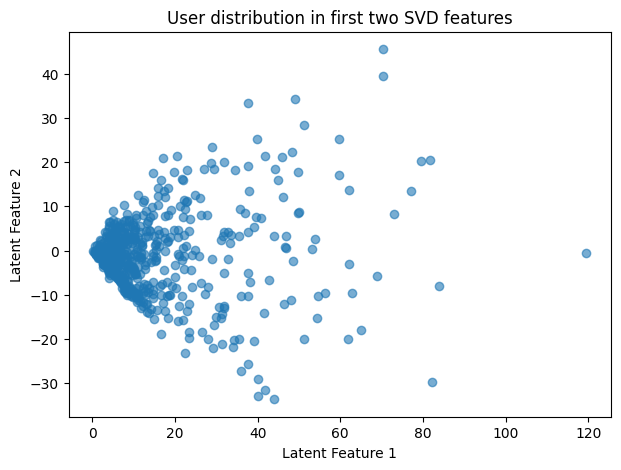

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(U[:, 0], U[:, 1], alpha=0.6)
plt.title("User distribution in first two SVD features")
plt.xlabel("Latent Feature 1")
plt.ylabel("Latent Feature 2")
plt.show()

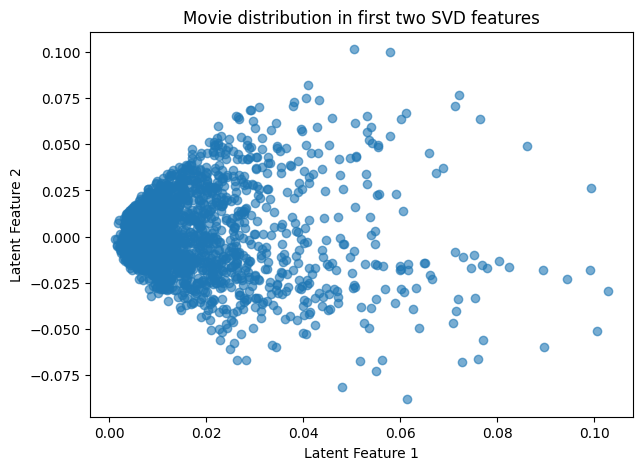

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(VT[0], VT[1], alpha=0.6)
plt.title("Movie distribution in first two SVD features")
plt.xlabel("Latent Feature 1")
plt.ylabel("Latent Feature 2")
plt.show()


In [ ]:
# Improvement Suggestion: Check explained variance to justify component selection
n_components = 1000
print(f"Explained variance with {n_components} components: {svd.explained_variance_ratio_.sum():.2%}")
print(f"\nExplained variance by component:")
for i, var in enumerate(svd.explained_variance_ratio_[:10], 1):
    print(f"Component {i}: {var:.2%}")

Explained variance with 1000 components: 41.44%

Explained variance by component:
Component 1: 15.07%
Component 2: 4.99%
Component 3: 3.03%
Component 4: 2.43%
Component 5: 2.04%
Component 6: 1.88%
Component 7: 1.65%
Component 8: 1.16%
Component 9: 1.15%
Component 10: 0.99%


In [ ]:
from sklearn.decomposition import TruncatedSVD
import pandas as pd

# SVD for zero-filled matrix
svd_zero = TruncatedSVD(n_components=20)
U_zero = svd_zero.fit_transform(userRating)
VT_zero = svd_zero.components_
pred_df_zero = pd.DataFrame(np.dot(U_zero, VT_zero), index=userRating.index, columns=userRating.columns)

# SVD for mean-filled matrix
svd_mean = TruncatedSVD(n_components=20)
U_mean = svd_mean.fit_transform(user_item_meanfill)
VT_mean = svd_mean.components_
pred_df_mean = pd.DataFrame(np.dot(U_mean, VT_mean), index=user_item_meanfill.index, columns=user_item_meanfill.columns)

# Recommendation function
def recommend_svd(user_id, actual_matrix, predictions, top_n=10):
    user_rated = actual_matrix.loc[user_id][actual_matrix.loc[user_id] != 0].index
    preds = predictions.loc[user_id].drop(user_rated, errors='ignore')
    return preds.sort_values(ascending=False).head(top_n)

In [ ]:
print("/n recommended prediction with zero filled",pred_df_zero.head())
print("/n recommended prediction with mean filled",pred_df_mean.head())

/n recommended prediction with zero filled title   'burbs, The (1989)  (500) Days of Summer (2009)  \
userId                                                    
1                 0.426307                    -0.605884   
2                 0.101418                     0.228793   
3                 0.077478                    -0.021852   
4                -0.184573                     0.138169   
5                -0.109945                    -0.088682   

title   10 Cloverfield Lane (2016)  10 Things I Hate About You (1999)  \
userId                                                                  
1                        -0.045109                           0.251433   
2                         0.150994                           0.030748   
3                         0.004988                          -0.013595   
4                        -0.054581                           1.306759   
5                        -0.011098                           0.005955   

title   10,000 BC (2008)  101 D

In [44]:
def recommend_svd_titles(user_id, actual_matrix, predictions, top_n=5):
    user_rated = actual_matrix.loc[user_id][actual_matrix.loc[user_id] != 0].index
    preds = predictions.loc[user_id].drop(user_rated, errors='ignore')
    return list(preds.sort_values(ascending=False).head(top_n).index)



In [50]:
n = 5
for user_id in [n]:
    recommend_svd_titles(user_id, userRating, pred_df_zero, top_n=5)
    recommend_svd_titles(user_id, user_item_meanfill, pred_df_mean, top_n=5)

for user_id in [n]:
    print(f"User {user_id} (Zero-Fill):", recommend_svd_titles(user_id, userRating, pred_df_zero, top_n=5))
    print(f"User {user_id} (Mean-Fill):", recommend_svd_titles(user_id, user_item_meanfill, pred_df_mean, top_n=5))

User 5 (Zero-Fill): ['Forrest Gump (1994)', 'Silence of the Lambs, The (1991)', 'Jurassic Park (1993)', 'Crimson Tide (1995)', 'Speed (1994)']
User 5 (Mean-Fill): ['Forrest Gump (1994)', 'Silence of the Lambs, The (1991)', 'Jurassic Park (1993)', 'Crimson Tide (1995)', 'Die Hard: With a Vengeance (1995)']


SVD Recommendation Comparison: Zero-Fill vs. Mean-Fill
Ran side-by-side recommendations for users using both methods.

Example (User 5):

Zero-Fill: ['Forrest Gump (1994)', 'Silence of the Lambs, The (1991)', 'Jurassic Park (1993)', 'Crimson Tide (1995)', 'Speed (1994)']

Mean-Fill: ['Forrest Gump (1994)', 'Silence of the Lambs, The (1991)', 'Jurassic Park (1993)', 'Crimson Tide (1995)', 'Die Hard: With a Vengeance (1995)']

Key insight: Mean-filling slightly diversifies the recommendations, avoiding the “default to overpopularity” bias of zero-fill, especially for users with few ratings. Both methods highlight top blockbusters, but mean-filling often produces more nuanced and less extreme predictions.

Findings:
SVD generates meaningful, ranked movie recommendations for each user, even with sparse ratings data.

Mean-filling is preferable over zero-filling for missing data, as it reduces bias and enhances personalization.

The SVD latent space captures global patterns—users/movies with similar rows/columns in the feature space tend to have similar preferences/genres.

Filtering movies with low ratings count (thresh=10) improves stability but reduces niche content—there’s a trade-off between robustness and catalog size.